# __Project Title__: Box Office Revenue Prediction

### __Problem Statement:__ The goal of this project is to predict the revenue of movies based on various factors such as genre, rating, production country, and more. By analyzing historical data, we aim to build a model that can estimate a movie's financial success.

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

__Loading the dataset__

In [5]:
df = pd.read_csv("box_office_data.csv")
df.head()

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,546388108.0,215409889.0,39.4,330978219.0,60.6,2000,"Adventure, Action, Thriller",6.126/10,6741.0,en,United States of America
1,2,Gladiator,460583960.0,187705427.0,40.8,272878533.0,59.2,2000,"Action, Drama, Adventure",8.217/10,19032.0,en,"United Kingdom, United States of America"
2,3,Cast Away,429632142.0,233632142.0,54.4,196000000.0,45.6,2000,"Adventure, Drama",7.663/10,11403.0,en,United States of America
3,4,What Women Want,374111707.0,182811707.0,48.9,191300000.0,51.1,2000,"Comedy, Romance",6.45/10,3944.0,en,"United Kingdom, United States of America"
4,5,Dinosaur,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,"Animation, Family, Adventure",6.544/10,2530.0,en,United States of America


__Dataset Information__

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  5000 non-null   int64  
 1   Release Group         5000 non-null   object 
 2   $Worldwide            5000 non-null   float64
 3   $Domestic             5000 non-null   float64
 4   Domestic %            5000 non-null   float64
 5   $Foreign              5000 non-null   float64
 6   Foreign %             5000 non-null   float64
 7   Year                  5000 non-null   int64  
 8   Genres                4822 non-null   object 
 9   Rating                4830 non-null   object 
 10  Vote_Count            4830 non-null   float64
 11  Original_Language     4830 non-null   object 
 12  Production_Countries  4800 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 507.9+ KB


In [8]:
df.shape

(5000, 13)

In [9]:
df.isnull().sum()

Rank                      0
Release Group             0
$Worldwide                0
$Domestic                 0
Domestic %                0
$Foreign                  0
Foreign %                 0
Year                      0
Genres                  178
Rating                  170
Vote_Count              170
Original_Language       170
Production_Countries    200
dtype: int64

### Data Cleaning

***Handling Missing Values***

In [12]:
df["Genres"].fillna("Unknown", inplace=True)
df["Rating"].fillna("Unrated", inplace=True)
df["Vote_Count"].fillna(0, inplace=True)
df["Original_Language"].fillna("Unknown", inplace=True)
df["Production_Countries"].fillna("Unknown", inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_22976\4019816636.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Genres"].fillna("Unknown", inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22976\4019816636.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [13]:
df.isnull().sum()

Rank                    0
Release Group           0
$Worldwide              0
$Domestic               0
Domestic %              0
$Foreign                0
Foreign %               0
Year                    0
Genres                  0
Rating                  0
Vote_Count              0
Original_Language       0
Production_Countries    0
dtype: int64

***Fix Datatypes***

In [15]:
df.dtypes

Rank                      int64
Release Group            object
$Worldwide              float64
$Domestic               float64
Domestic %              float64
$Foreign                float64
Foreign %               float64
Year                      int64
Genres                   object
Rating                   object
Vote_Count              float64
Original_Language        object
Production_Countries     object
dtype: object

**Rename Columns**

In [17]:
df.rename(columns={
    "$Worldwide": "Worldwide_Gross",
    "$Domestic": "Domestic_Gross",
    "Domestic %": "Domestic_Percentage",
    "$Foreign": "Foreign_Gross",
    "Foreign %": "Foreign_Percentage"
}, inplace=True)

__Feature Engineering__

Changed the data types of required features

In [20]:
df["Rating"] = df["Rating"].str.extract(r'([\d.]+)').astype(float)
df["Vote_Count"] = df["Vote_Count"].astype(int)

Extract the primary genre

In [22]:
df['Primary_Genre'] = df['Genres'].str.split(',').str[0]

__Feature Encoding__

In [24]:
df['Production_Countries'] = df['Production_Countries'].map(df['Production_Countries'].value_counts())

In [25]:
df.head(10)

,Rank,Release Group,Worldwide_Gross,Domestic_Gross,Domestic_Percentage,Foreign_Gross,Foreign_Percentage,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries,Primary_Genre
0,1,Mission: Impossible II,546388108.0,215409889.0,39.4,330978219.0,60.6,2000,"Adventure, Action, Thriller",6.126,6741,en,1964,Adventure
1,2,Gladiator,460583960.0,187705427.0,40.8,272878533.0,59.2,2000,"Action, Drama, Adventure",8.217,19032,en,217,Action
2,3,Cast Away,429632142.0,233632142.0,54.4,196000000.0,45.6,2000,"Adventure, Drama",7.663,11403,en,1964,Adventure
3,4,What Women Want,374111707.0,182811707.0,48.9,191300000.0,51.1,2000,"Comedy, Romance",6.450,3944,en,217,Comedy
4,5,Dinosaur,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,"Animation, Family, Adventure",6.544,2530,en,1964,Animation
5,6,How the Grinch Stole Christmas,345842198.0,260745620.0,75.4,85096578.0,24.6,2000,"Family, Comedy, Fantasy",6.800,7591,en,89,Family
6,7,Meet the Parents,330444045.0,166244045.0,50.3,164200000.0,49.7,2000,"Comedy, Romance",6.675,5916,en,1964,Comedy
7,8,The Perfect Storm,328718434.0,182618434.0,55.6,146100000.0,44.4,2000,"Action, Adventure, Drama, Thriller",6.466,2312,en,1964,Action
8,9,X-Men,296339528.0,157299718.0,53.1,139039810.0,46.9,2000,"Adventure, Action, Science Fiction",7.005,11355,en,1964,Adventure
9,10,What Lies Beneath,291420351.0,155464351.0,53.3,135956000.0,46.7,2000,"Drama, Horror, Mystery, Thriller",6.416,1818,en,1964,Drama


In [26]:
genre_avg_revenue = df.groupby('Primary_Genre')['Worldwide_Gross'].mean().to_dict()
df['Primary_Genre'] = df['Primary_Genre'].map(genre_avg_revenue)

In [27]:
df['Original_Language'] = df['Original_Language'].map(df['Original_Language'].value_counts())

In [89]:
df.head()

,Worldwide_Gross,Domestic_Gross,Domestic_Percentage,Foreign_Gross,Foreign_Percentage,Year,Rating,Vote_Count,Original_Language,Production_Countries,Primary_Genre
0,476071180.0,181030624.0,39.4,319400000.0,60.6,2000,6.126,6741,3271,1964,2.843795e+08
1,460583960.0,181030624.0,40.8,272878533.0,59.2,2000,8.119,10235,3271,217,1.804786e+08
2,429632142.0,181030624.0,54.4,196000000.0,45.6,2000,7.663,10235,3271,1964,2.843795e+08
3,374111707.0,181030624.0,48.9,191300000.0,51.1,2000,6.450,3944,3271,217,7.518238e+07
4,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,6.544,2530,3271,1964,1.770618e+08


In [28]:
df.dtypes

Rank                      int64
Release Group            object
Worldwide_Gross         float64
Domestic_Gross          float64
Domestic_Percentage     float64
Foreign_Gross           float64
Foreign_Percentage      float64
Year                      int64
Genres                   object
Rating                  float64
Vote_Count                int32
Original_Language         int64
Production_Countries      int64
Primary_Genre           float64
dtype: object

In [29]:
numeric_cols=['Worldwide_Gross', 'Domestic_Gross', 'Foreign_Gross', 'Rating', 'Vote_Count']
print(df[numeric_cols].describe())


       Worldwide_Gross  Domestic_Gross  Foreign_Gross       Rating  \
count     5.000000e+03    5.000000e+03   5.000000e+03  4830.000000   
mean      1.192137e+08    4.472523e+07   7.448809e+07     6.510418   
std       2.005243e+08    7.727026e+07   1.334932e+08     0.951805   
min       1.666028e+06    0.000000e+00   0.000000e+00     0.000000   
25%       2.466220e+07    9.275150e+04   1.371034e+07     6.011000   
50%       4.844658e+07    1.798421e+07   3.019444e+07     6.600000   
75%       1.197588e+08    5.386847e+07   7.211578e+07     7.107750   
max       2.799439e+09    9.366622e+08   1.993811e+09     9.700000   

         Vote_Count  
count   5000.000000  
mean    2445.512000  
std     3905.638983  
min        0.000000  
25%      165.000000  
50%      957.000000  
75%     2939.000000  
max    36753.000000  


In [30]:
from scipy.stats.mstats import winsorize

for col in numeric_cols:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])  # Caps top & bottom 5% values

__Shape after data cleaning__

In [32]:
df.shape

(5000, 14)

### Data Visualization

__Pie Chart: Domestic vs Foriegn Revenue Distribution__

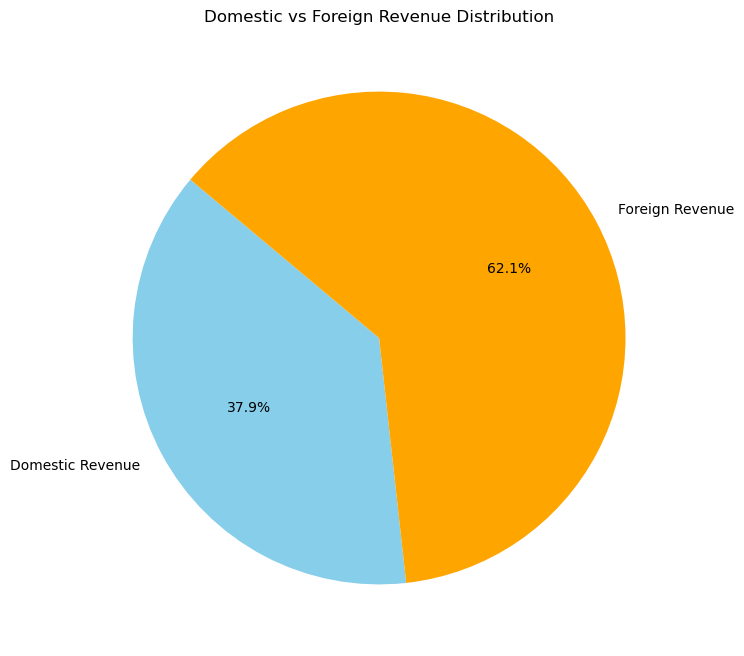

In [35]:
total_domestic = df['Domestic_Gross'].sum()
total_foreign = df['Foreign_Gross'].sum()
labels = ['Domestic Revenue', 'Foreign Revenue']
sizes = [total_domestic, total_foreign]
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Domestic vs Foreign Revenue Distribution')
plt.show()

__Bar Plot: Number of Movies by Genre__

C:\Users\user\AppData\Local\Temp\ipykernel_22976\1783020094.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')


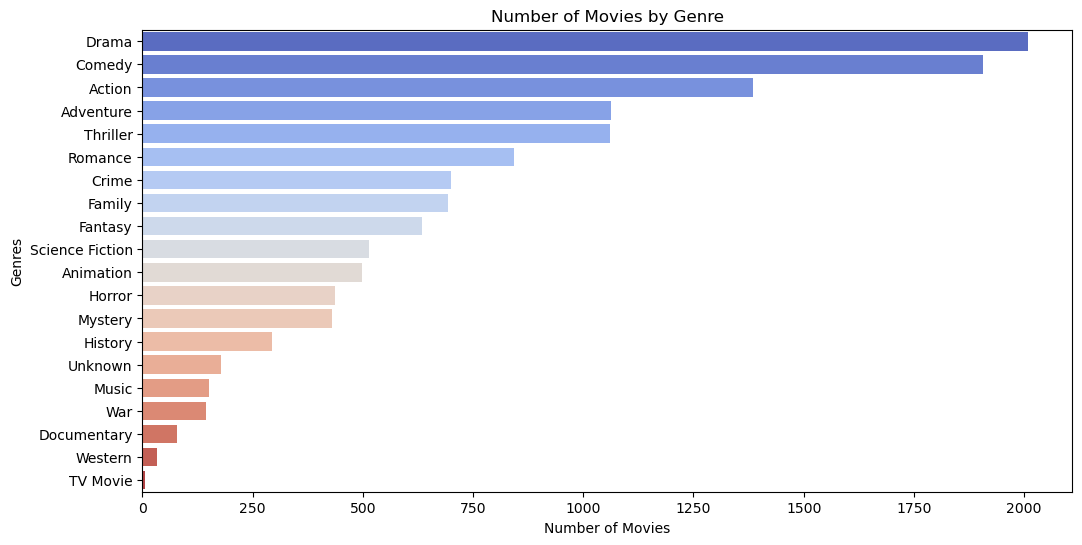

In [37]:
genres_expanded = df['Genres'].str.get_dummies(sep=', ')
genre_counts = genres_expanded.sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')
plt.title('Number of Movies by Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()

__Feature Selection__

Droped the Redundant Columms

In [40]:
# List of columns to drop
columns_to_drop = ["Rank", "Release Group","Genres"]

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Display the cleaned dataset's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Worldwide_Gross       5000 non-null   float64
 1   Domestic_Gross        5000 non-null   float64
 2   Domestic_Percentage   5000 non-null   float64
 3   Foreign_Gross         5000 non-null   float64
 4   Foreign_Percentage    5000 non-null   float64
 5   Year                  5000 non-null   int64  
 6   Rating                5000 non-null   float64
 7   Vote_Count            5000 non-null   int32  
 8   Original_Language     5000 non-null   int64  
 9   Production_Countries  5000 non-null   int64  
 10  Primary_Genre         5000 non-null   float64
dtypes: float64(7), int32(1), int64(3)
memory usage: 410.3 KB


In [100]:
# List of columns to drop
columns_to_drop = ['Domestic_Gross','Domestic_Percentage','Foreign_Percentage','Original_Language','Primary_Genre',]

# Drop the columns
df = df.drop(columns=columns_to_drop)

KeyError: "['Domestic_Gross', 'Domestic_Percentage', 'Foreign_Percentage', 'Original_Language', 'Primary_Genre'] not found in axis"

In [102]:
# List of columns to drop
columns_to_drop = ['Foreign_Gross']

# Drop the columns
df = df.drop(columns=columns_to_drop)

In [104]:
df.dtypes

Worldwide_Gross         float64
Year                      int64
Rating                  float64
Vote_Count                int32
Production_Countries      int64
dtype: object

### __Machine Learning__

In [106]:
# Define features and target variable
X = df.drop(columns=['Worldwide_Gross'])  # Features
y = df['Worldwide_Gross']  # Target variable

__Linear Regression__

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split the data (assuming X and y are already defined and preprocessed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Print evaluation metrics
print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")

Linear Regression Performance:
MAE: 51291563.99
RMSE: 80295680.17
R² Score: 0.5943


__Random Forest Regression__

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.6578
RMSE: 73744759.39


In [114]:
train_r2 = r2_score(y_train, rf_model.predict(X_train))
test_r2 = r2_score(y_test, y_pred)
print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")

Train R²: 0.9349, Test R²: 0.6578


__Cross Validation__


For Verifying whether the model overfit


In [117]:
from sklearn.model_selection import cross_val_score

# Define model again to use in CV (no need to refit manually)
from sklearn.ensemble import RandomForestRegressor

rf_cv_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# 5-fold cross-validation using R²
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", cv_scores)
print("Average R² Score:", np.mean(cv_scores))

Cross-Validation R² Scores: [0.65789567 0.66086131 0.61086102 0.47464327 0.30599583]
Average R² Score: 0.5420514173846127


__Residual Plot__

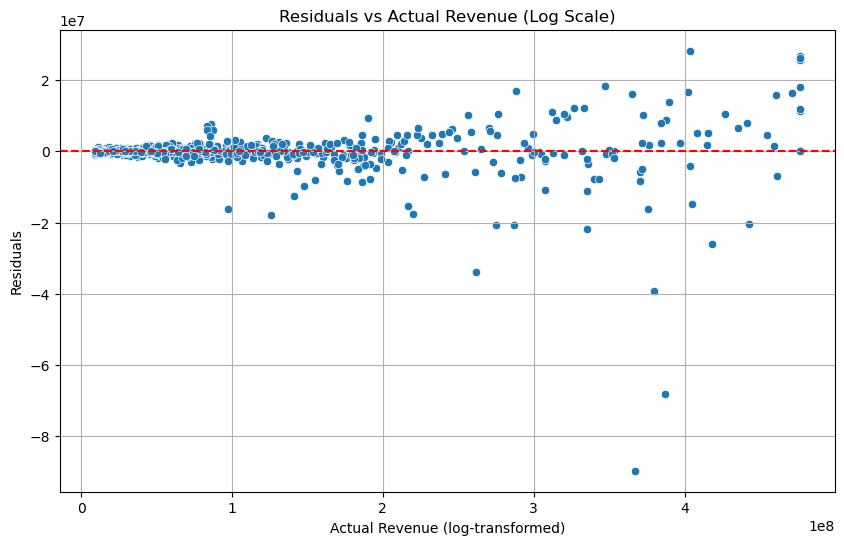

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = y_test - y_pred  # use y_pred for Random Forest predictions

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Actual Revenue (Log Scale)")
plt.xlabel("Actual Revenue (log-transformed)")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [53]:
#def predict_revenue(model, year, vote_count, rating, genre):
    # Convert rating from 'x/10' string to float if needed
#    if isinstance(rating, str) and '/' in rating:
#        rating = float(rating.split('/')[0])

    # Prepare input with same columns used in training
#    input_data = pd.DataFrame([{
#        'Year': year,
#        'Vote_Count': vote_count,
#        'Rating': rating,
#        'Primary_Genre': genre
#    }])

    # Predict using the trained model
#    prediction = model.predict(input_data)[0]
#   return round(prediction, 2)

In [54]:
#predicted = predict_revenue(
#    rf_model,
#    year=2025,
#    vote_count=6800,
#    rating=7.2,
#    genre='Action'
#)

#print(f"Predicted Worldwide Revenue: ${predicted}")

In [55]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.impute import SimpleImputer
# import joblib
# import pandas as pd

# # Save model and encoders
# joblib.dump(rf_model, 'model.pkl')

In [119]:
import pickle

# Suppose this is your trained model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)

# ✅ Save the model object (not prediction results!)
pickle.dump(model, open('Box_Office_Revenue_Prediciton.pkl', 'wb'))